# Contrat de maintenance

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt

Importation du csv dans un dataframe

In [31]:
df_ = pd.read_csv('../dataset/clean_online_retail.csv')
df = df_.copy()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797815 entries, 0 to 797814
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797815 non-null  object 
 1   StockCode    797815 non-null  object 
 2   Description  797815 non-null  object 
 3   Quantity     797815 non-null  int64  
 4   InvoiceDate  797815 non-null  object 
 5   Price        797815 non-null  float64
 6   Customer ID  797815 non-null  int64  
 7   Country      797815 non-null  object 
 8   TotalPrice   797815 non-null  float64
 9   cancelled    797815 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 60.9+ MB


In [33]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

## Création des dataframe filtrés, à +1jours, +15jours, +1mois, +2mois, etc

In [34]:
df_filtered_0 = df[df['InvoiceDate'] <= pd.to_datetime('2010-12-31')]
df_filtered_J1 = df[df['InvoiceDate'] <= pd.to_datetime('2011-01-01')]
df_filtered_J15 = df[df['InvoiceDate'] <= pd.to_datetime('2011-01-15')]
df_filtered_1 = df[df['InvoiceDate'] <= pd.to_datetime('2011-01-31')]
df_filtered_2 = df[df['InvoiceDate'] <= pd.to_datetime('2011-02-28')]
df_filtered_3 = df[df['InvoiceDate'] <= pd.to_datetime('2011-03-31')]
df_filtered_4 = df[df['InvoiceDate'] <= pd.to_datetime('2011-04-30')]
df_filtered_5 = df[df['InvoiceDate'] <= pd.to_datetime('2011-05-31')]
df_filtered_6 = df[df['InvoiceDate'] <= pd.to_datetime('2011-06-30')]
df_filtered_7 = df[df['InvoiceDate'] <= pd.to_datetime('2011-07-31')]
df_filtered_8 = df[df['InvoiceDate'] <= pd.to_datetime('2011-08-31')]
df_filtered_9 = df[df['InvoiceDate'] <= pd.to_datetime('2011-09-30')]
df_filtered_10 = df[df['InvoiceDate'] <= pd.to_datetime('2011-10-31')]
df_filtered_11 = df[df['InvoiceDate'] <= pd.to_datetime('2011-11-28')]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,cancelled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,0
...,...,...,...,...,...,...,...,...,...,...
797810,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,0
797811,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0
797812,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,0
797813,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,0


## Feature "Cancellation Percentage" pour tous les dataframe

In [35]:
#2009/2010
df_gp_cancellation_0 = df_filtered_0.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_0 = df_gp_cancellation_0.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_0["CancellationPercentage"] = (df_gp_cancellation_0["TotalCancelled"] / df_gp_cancellation_0["TotalInvoices"]) * 100

#J+1
df_gp_cancellation_J1 = df_filtered_J1.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_J1 = df_gp_cancellation_J1.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_J1["CancellationPercentage"] = (df_gp_cancellation_J1["TotalCancelled"] / df_gp_cancellation_J1["TotalInvoices"]) * 100

#J+15
df_gp_cancellation_J15 = df_filtered_J15.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_J15 = df_gp_cancellation_J15.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_J15["CancellationPercentage"] = (df_gp_cancellation_J15["TotalCancelled"] / df_gp_cancellation_J15["TotalInvoices"]) * 100

#M+1
df_gp_cancellation_1 = df_filtered_1.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_1 = df_gp_cancellation_1.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_1["CancellationPercentage"] = (df_gp_cancellation_1["TotalCancelled"] / df_gp_cancellation_1["TotalInvoices"]) * 100

#M+2
df_gp_cancellation_2 = df_filtered_2.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_2 = df_gp_cancellation_2.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_2["CancellationPercentage"] = (df_gp_cancellation_2["TotalCancelled"] / df_gp_cancellation_2["TotalInvoices"]) * 100

#M+3
df_gp_cancellation_3 = df_filtered_3.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_3 = df_gp_cancellation_3.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_3["CancellationPercentage"] = (df_gp_cancellation_3["TotalCancelled"] / df_gp_cancellation_3["TotalInvoices"]) * 100

#M+4
df_gp_cancellation_4 = df_filtered_4.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_4 = df_gp_cancellation_J1.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_4["CancellationPercentage"] = (df_gp_cancellation_4["TotalCancelled"] / df_gp_cancellation_4["TotalInvoices"]) * 100

#M+5
df_gp_cancellation_5 = df_filtered_5.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_5 = df_gp_cancellation_5.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_5["CancellationPercentage"] = (df_gp_cancellation_5["TotalCancelled"] / df_gp_cancellation_5["TotalInvoices"]) * 100

#M+6
df_gp_cancellation_6 = df_filtered_6.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_6 = df_gp_cancellation_1.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_6["CancellationPercentage"] = (df_gp_cancellation_6["TotalCancelled"] / df_gp_cancellation_6["TotalInvoices"]) * 100

#M+7
df_gp_cancellation_7 = df_filtered_7.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_7 = df_gp_cancellation_7.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_7["CancellationPercentage"] = (df_gp_cancellation_7["TotalCancelled"] / df_gp_cancellation_7["TotalInvoices"]) * 100

#M+8
df_gp_cancellation_8 = df_filtered_8.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_8 = df_gp_cancellation_8.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_8["CancellationPercentage"] = (df_gp_cancellation_8["TotalCancelled"] / df_gp_cancellation_8["TotalInvoices"]) * 100

#M+9
df_gp_cancellation_9 = df_filtered_9.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_9 = df_gp_cancellation_9.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_9["CancellationPercentage"] = (df_gp_cancellation_9["TotalCancelled"] / df_gp_cancellation_9["TotalInvoices"]) * 100

#M+10
df_gp_cancellation_10 = df_filtered_10.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_10 = df_gp_cancellation_10.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_10["CancellationPercentage"] = (df_gp_cancellation_10["TotalCancelled"] / df_gp_cancellation_10["TotalInvoices"]) * 100

#M+11
df_gp_cancellation_11 = df_filtered_11.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation_11 = df_gp_cancellation_11.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation_11["CancellationPercentage"] = (df_gp_cancellation_11["TotalCancelled"] / df_gp_cancellation_11["TotalInvoices"]) * 100

#M+12
df_gp_cancellation = df.groupby("Customer ID").agg({"cancelled": "sum", "Invoice": "count"})
df_gp_cancellation = df_gp_cancellation.rename(columns={"cancelled": "TotalCancelled", "Invoice": "TotalInvoices"})
df_gp_cancellation["CancellationPercentage"] = (df_gp_cancellation["TotalCancelled"] / df_gp_cancellation["TotalInvoices"]) * 100

## Feature "AvgItemsPerOrder" pour tous les dataframes

In [36]:
#0
df_gp_nb_articles_mean_0 = df_filtered_0.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_0 = df_gp_nb_articles_mean_0.groupby('Customer ID').mean()
df_gp_nb_articles_mean_0.columns = ['AvgItemsPerOrder']

#J+1
df_gp_nb_articles_mean_J1 = df_filtered_J1.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_J1 = df_gp_nb_articles_mean_J1.groupby('Customer ID').mean()
df_gp_nb_articles_mean_J1.columns = ['AvgItemsPerOrder']

#J+15
df_gp_nb_articles_mean_J15 = df_filtered_J15.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_J15 = df_gp_nb_articles_mean_J15.groupby('Customer ID').mean()
df_gp_nb_articles_mean_J15.columns = ['AvgItemsPerOrder']

#M+1
df_gp_nb_articles_mean_1 = df_filtered_1.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_1 = df_gp_nb_articles_mean_1.groupby('Customer ID').mean()
df_gp_nb_articles_mean_1.columns = ['AvgItemsPerOrder']

#M+2
df_gp_nb_articles_mean_2 = df_filtered_2.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_2 = df_gp_nb_articles_mean_2.groupby('Customer ID').mean()
df_gp_nb_articles_mean_2.columns = ['AvgItemsPerOrder']

#M+3
df_gp_nb_articles_mean_3 = df_filtered_3.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_3 = df_gp_nb_articles_mean_3.groupby('Customer ID').mean()
df_gp_nb_articles_mean_3.columns = ['AvgItemsPerOrder']

#M+4
df_gp_nb_articles_mean_4 = df_filtered_4.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_4 = df_gp_nb_articles_mean_4.groupby('Customer ID').mean()
df_gp_nb_articles_mean_4.columns = ['AvgItemsPerOrder']

#M+5
df_gp_nb_articles_mean_5 = df_filtered_5.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_5 = df_gp_nb_articles_mean_5.groupby('Customer ID').mean()
df_gp_nb_articles_mean_5.columns = ['AvgItemsPerOrder']

#M+6
df_gp_nb_articles_mean_6 = df_filtered_6.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_6 = df_gp_nb_articles_mean_6.groupby('Customer ID').mean()
df_gp_nb_articles_mean_6.columns = ['AvgItemsPerOrder']

#M+7
df_gp_nb_articles_mean_7 = df_filtered_7.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_7 = df_gp_nb_articles_mean_7.groupby('Customer ID').mean()
df_gp_nb_articles_mean_7.columns = ['AvgItemsPerOrder']

#M+8
df_gp_nb_articles_mean_8 = df_filtered_8.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_8 = df_gp_nb_articles_mean_8.groupby('Customer ID').mean()
df_gp_nb_articles_mean_8.columns = ['AvgItemsPerOrder']

#M+9
df_gp_nb_articles_mean_9 = df_filtered_9.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_9 = df_gp_nb_articles_mean_9.groupby('Customer ID').mean()
df_gp_nb_articles_mean_9.columns = ['AvgItemsPerOrder']

#M+10
df_gp_nb_articles_mean_10 = df_filtered_10.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_10 = df_gp_nb_articles_mean_10.groupby('Customer ID').mean()
df_gp_nb_articles_mean_10.columns = ['AvgItemsPerOrder']

#M+11
df_gp_nb_articles_mean_11 = df_filtered_11.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean_11 = df_gp_nb_articles_mean_11.groupby('Customer ID').mean()
df_gp_nb_articles_mean_11.columns = ['AvgItemsPerOrder']

#M+12
df_gp_nb_articles_mean = df.groupby(['Customer ID', 'Invoice']).agg({'Quantity': 'sum'})
df_gp_nb_articles_mean = df_gp_nb_articles_mean.groupby('Customer ID').mean()
df_gp_nb_articles_mean.columns = ['AvgItemsPerOrder']


## Features RFM pour tous les dataframes

In [37]:
#2009/2010
last_date_0 = df_filtered_0["InvoiceDate"].max()
recency_0 = (last_date_0 - df_filtered_0.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_0 = df_filtered_0.groupby("Customer ID")["Invoice"].nunique()
monetary_value_0 = df_filtered_0.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_0 = pd.DataFrame({
    "Recency": recency_0,
    "Frequency": frequency_0,
    "MonetaryValue": monetary_value_0
})

#J+1
last_date_J1 = df_filtered_J1["InvoiceDate"].max()
recency_J1 = (last_date_J1 - df_filtered_J1.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_J1 = df_filtered_J1.groupby("Customer ID")["Invoice"].nunique()
monetary_value_J1 = df_filtered_J1.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_J1 = pd.DataFrame({
    "Recency": recency_J1,
    "Frequency": frequency_J1,
    "MonetaryValue": monetary_value_J1
})

#J+15
last_date_J15 = df_filtered_J15["InvoiceDate"].max()
recency_J15 = (last_date_J15 - df_filtered_J15.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_J15 = df_filtered_J15.groupby("Customer ID")["Invoice"].nunique()
monetary_value_J15 = df_filtered_J15.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_J15 = pd.DataFrame({
    "Recency": recency_J15,
    "Frequency": frequency_J15,
    "MonetaryValue": monetary_value_J15
})

#M+1
last_date_1 = df_filtered_1["InvoiceDate"].max()
recency_1 = (last_date_1 - df_filtered_1.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_1 = df_filtered_1.groupby("Customer ID")["Invoice"].nunique()
monetary_value_1 = df_filtered_1.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_1 = pd.DataFrame({
    "Recency": recency_1,
    "Frequency": frequency_1,
    "MonetaryValue": monetary_value_1
})

#M+2
last_date_2 = df_filtered_2["InvoiceDate"].max()
recency_2 = (last_date_2 - df_filtered_2.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_2 = df_filtered_2.groupby("Customer ID")["Invoice"].nunique()
monetary_value_2 = df_filtered_2.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_2 = pd.DataFrame({
    "Recency": recency_2,
    "Frequency": frequency_2,
    "MonetaryValue": monetary_value_2
})

#M+3
last_date_3 = df_filtered_3["InvoiceDate"].max()
recency_3 = (last_date_3 - df_filtered_3.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_3 = df_filtered_3.groupby("Customer ID")["Invoice"].nunique()
monetary_value_3 = df_filtered_3.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_3 = pd.DataFrame({
    "Recency": recency_3,
    "Frequency": frequency_3,
    "MonetaryValue": monetary_value_3
})

#M+4
last_date_4 = df_filtered_4["InvoiceDate"].max()
recency_4 = (last_date_4 - df_filtered_4.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_4 = df_filtered_4.groupby("Customer ID")["Invoice"].nunique()
monetary_value_4 = df_filtered_4.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_4 = pd.DataFrame({
    "Recency": recency_4,
    "Frequency": frequency_4,
    "MonetaryValue": monetary_value_4
})

#M+5
last_date_5 = df_filtered_5["InvoiceDate"].max()
recency_5 = (last_date_5 - df_filtered_5.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_5 = df_filtered_5.groupby("Customer ID")["Invoice"].nunique()
monetary_value_5 = df_filtered_5.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_5 = pd.DataFrame({
    "Recency": recency_5,
    "Frequency": frequency_5,
    "MonetaryValue": monetary_value_5
})

#M+6
last_date_6 = df_filtered_6["InvoiceDate"].max()
recency_6 = (last_date_6 - df_filtered_6.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_6 = df_filtered_6.groupby("Customer ID")["Invoice"].nunique()
monetary_value_6 = df_filtered_6.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_6 = pd.DataFrame({
    "Recency": recency_6,
    "Frequency": frequency_6,
    "MonetaryValue": monetary_value_6
})

#M+7
last_date_7 = df_filtered_7["InvoiceDate"].max()
recency_7 = (last_date_7 - df_filtered_7.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_7 = df_filtered_7.groupby("Customer ID")["Invoice"].nunique()
monetary_value_7 = df_filtered_7.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_7 = pd.DataFrame({
    "Recency": recency_7,
    "Frequency": frequency_7,
    "MonetaryValue": monetary_value_7
})

#M+8
last_date_8 = df_filtered_8["InvoiceDate"].max()
recency_8 = (last_date_8 - df_filtered_8.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_8 = df_filtered_8.groupby("Customer ID")["Invoice"].nunique()
monetary_value_8 = df_filtered_8.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_8 = pd.DataFrame({
    "Recency": recency_8,
    "Frequency": frequency_8,
    "MonetaryValue": monetary_value_8
})

#M+9
last_date_9 = df_filtered_9["InvoiceDate"].max()
recency_9 = (last_date_9 - df_filtered_9.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_9 = df_filtered_9.groupby("Customer ID")["Invoice"].nunique()
monetary_value_9 = df_filtered_9.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_9 = pd.DataFrame({
    "Recency": recency_9,
    "Frequency": frequency_9,
    "MonetaryValue": monetary_value_9
})

#M+10
last_date_10 = df_filtered_10["InvoiceDate"].max()
recency_10 = (last_date_10 - df_filtered_10.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_10 = df_filtered_10.groupby("Customer ID")["Invoice"].nunique()
monetary_value_10 = df_filtered_10.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_10 = pd.DataFrame({
    "Recency": recency_10,
    "Frequency": frequency_10,
    "MonetaryValue": monetary_value_10
})

#M+11
last_date_11 = df_filtered_11["InvoiceDate"].max()
recency_11 = (last_date_11 - df_filtered_11.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency_11 = df_filtered_11.groupby("Customer ID")["Invoice"].nunique()
monetary_value_11 = df_filtered_11.groupby("Customer ID")["TotalPrice"].sum()
rfm_df_11 = pd.DataFrame({
    "Recency": recency_11,
    "Frequency": frequency_11,
    "MonetaryValue": monetary_value_11
})

#M+12
last_date = df["InvoiceDate"].max()
recency = (last_date - df.groupby("Customer ID")["InvoiceDate"].max()).dt.days
frequency = df.groupby("Customer ID")["Invoice"].nunique()
monetary_value = df.groupby("Customer ID")["TotalPrice"].sum()
rfm_df = pd.DataFrame({
    "Recency": recency,
    "Frequency": frequency,
    "MonetaryValue": monetary_value
})

## Fusion des features dans un dataframe pour le clustering

In [38]:
# 2009/2010
df_rfm_spe_0 = df_filtered_0.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_0.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_0 = df_rfm_spe_0.merge(rfm_df_0["Recency"], on="Customer ID")
df_rfm_spe_0 = df_rfm_spe_0.merge(df_gp_cancellation_0["CancellationPercentage"], on="Customer ID")
df_rfm_spe_0 = df_rfm_spe_0.merge(df_gp_nb_articles_mean_0["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_0.to_csv('data ARI/rfm_0.csv')

# J+1
df_rfm_spe_J1 = df_filtered_J1.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_J1.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_J1 = df_rfm_spe_J1.merge(rfm_df_J1["Recency"], on="Customer ID")
df_rfm_spe_J1 = df_rfm_spe_J1.merge(df_gp_cancellation_J1["CancellationPercentage"], on="Customer ID")
df_rfm_spe_J1 = df_rfm_spe_J1.merge(df_gp_nb_articles_mean_J1["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_J1.to_csv('data ARI/rfm_J1.csv')

# J+15
df_rfm_spe_J15 = df_filtered_J15.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_J15.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_J15 = df_rfm_spe_J15.merge(rfm_df_J15["Recency"], on="Customer ID")
df_rfm_spe_J15 = df_rfm_spe_J15.merge(df_gp_cancellation_J15["CancellationPercentage"], on="Customer ID")
df_rfm_spe_J15 = df_rfm_spe_J15.merge(df_gp_nb_articles_mean_J15["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_J15.to_csv('data ARI/rfm_J15.csv')

# M+1
df_rfm_spe_1 = df_filtered_1.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_1.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_1 = df_rfm_spe_1.merge(rfm_df_1["Recency"], on="Customer ID")
df_rfm_spe_1 = df_rfm_spe_1.merge(df_gp_cancellation_1["CancellationPercentage"], on="Customer ID")
df_rfm_spe_1 = df_rfm_spe_1.merge(df_gp_nb_articles_mean_1["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_1.to_csv('data ARI/rfm_1.csv')

# M+2
df_rfm_spe_2 = df_filtered_2.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_2.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_2 = df_rfm_spe_2.merge(rfm_df_2["Recency"], on="Customer ID")
df_rfm_spe_2 = df_rfm_spe_2.merge(df_gp_cancellation_2["CancellationPercentage"], on="Customer ID")
df_rfm_spe_2 = df_rfm_spe_2.merge(df_gp_nb_articles_mean_2["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_2.to_csv('data ARI/rfm_2.csv')

# M+3
df_rfm_spe_3 = df_filtered_3.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_3.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_3 = df_rfm_spe_3.merge(rfm_df_3["Recency"], on="Customer ID")
df_rfm_spe_3 = df_rfm_spe_3.merge(df_gp_cancellation_3["CancellationPercentage"], on="Customer ID")
df_rfm_spe_3 = df_rfm_spe_3.merge(df_gp_nb_articles_mean_3["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_3.to_csv('data ARI/rfm_3.csv')

# M+4
df_rfm_spe_4 = df_filtered_4.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_4.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_4 = df_rfm_spe_4.merge(rfm_df_4["Recency"], on="Customer ID")
df_rfm_spe_4 = df_rfm_spe_4.merge(df_gp_cancellation_4["CancellationPercentage"], on="Customer ID")
df_rfm_spe_4 = df_rfm_spe_4.merge(df_gp_nb_articles_mean_4["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_4.to_csv('data ARI/rfm_4.csv')

# M+5
df_rfm_spe_5 = df_filtered_5.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_5.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_5 = df_rfm_spe_5.merge(rfm_df_5["Recency"], on="Customer ID")
df_rfm_spe_5 = df_rfm_spe_5.merge(df_gp_cancellation_5["CancellationPercentage"], on="Customer ID")
df_rfm_spe_5 = df_rfm_spe_5.merge(df_gp_nb_articles_mean_5["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_5.to_csv('data ARI/rfm_5.csv')

# 6
df_rfm_spe_6 = df_filtered_6.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_6.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_6 = df_rfm_spe_6.merge(rfm_df_6["Recency"], on="Customer ID")
df_rfm_spe_6 = df_rfm_spe_6.merge(df_gp_cancellation_6["CancellationPercentage"], on="Customer ID")
df_rfm_spe_6 = df_rfm_spe_6.merge(df_gp_nb_articles_mean_6["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_6.to_csv('data ARI/rfm_6.csv')

# M+7
df_rfm_spe_7 = df_filtered_7.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_7.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_7 = df_rfm_spe_7.merge(rfm_df_7["Recency"], on="Customer ID")
df_rfm_spe_7 = df_rfm_spe_7.merge(df_gp_cancellation_7["CancellationPercentage"], on="Customer ID")
df_rfm_spe_7 = df_rfm_spe_7.merge(df_gp_nb_articles_mean_7["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_7.to_csv('data ARI/rfm_7.csv')

# M+8
df_rfm_spe_8 = df_filtered_8.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_8.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_8 = df_rfm_spe_8.merge(rfm_df_8["Recency"], on="Customer ID")
df_rfm_spe_8 = df_rfm_spe_8.merge(df_gp_cancellation_8["CancellationPercentage"], on="Customer ID")
df_rfm_spe_8 = df_rfm_spe_8.merge(df_gp_nb_articles_mean_8["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_8.to_csv('data ARI/rfm_8.csv')

# M+9
df_rfm_spe_9 = df_filtered_9.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_9.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_9 = df_rfm_spe_9.merge(rfm_df_9["Recency"], on="Customer ID")
df_rfm_spe_9 = df_rfm_spe_9.merge(df_gp_cancellation_9["CancellationPercentage"], on="Customer ID")
df_rfm_spe_9 = df_rfm_spe_9.merge(df_gp_nb_articles_mean_9["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_9.to_csv('data ARI/rfm_9.csv')

# M+10
df_rfm_spe_10 = df_filtered_10.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_10.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_10 = df_rfm_spe_10.merge(rfm_df_10["Recency"], on="Customer ID")
df_rfm_spe_10 = df_rfm_spe_10.merge(df_gp_cancellation_10["CancellationPercentage"], on="Customer ID")
df_rfm_spe_10 = df_rfm_spe_10.merge(df_gp_nb_articles_mean_10["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_10.to_csv('data ARI/rfm_10.csv')

# M+11
df_rfm_spe_11 = df_filtered_11.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe_11.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_11 = df_rfm_spe_11.merge(rfm_df_11["Recency"], on="Customer ID")
df_rfm_spe_11 = df_rfm_spe_11.merge(df_gp_cancellation_11["CancellationPercentage"], on="Customer ID")
df_rfm_spe_11 = df_rfm_spe_11.merge(df_gp_nb_articles_mean_11["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_11.to_csv('data ARI/rfm_11.csv')

# M+12
df_rfm_spe = df.groupby('Customer ID').agg({'Invoice': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'})
df_rfm_spe.columns = ['TotalInvoices', 'TotalQuantity', 'TotalPrice']
df_rfm_spe_11 = df_rfm_spe.merge(rfm_df["Recency"], on="Customer ID")
df_rfm_spe_11 = df_rfm_spe.merge(df_gp_cancellation["CancellationPercentage"], on="Customer ID")
df_rfm_spe_11 = df_rfm_spe.merge(df_gp_nb_articles_mean["AvgItemsPerOrder"], on="Customer ID")
df_rfm_spe_11.to_csv('data ARI/rfm_12.csv')

In [39]:
df_0 = pd.read_csv('data ARI/rfm_0.csv', index_col='Customer ID')
df_J1 = pd.read_csv('data ARI/rfm_J1.csv', index_col='Customer ID')
df_J15 = pd.read_csv('data ARI/rfm_J15.csv', index_col='Customer ID')
df_1 = pd.read_csv('data ARI/rfm_1.csv', index_col='Customer ID')
df_2 = pd.read_csv('data ARI/rfm_2.csv', index_col='Customer ID')
df_3 = pd.read_csv('data ARI/rfm_3.csv', index_col='Customer ID')
df_4 = pd.read_csv('data ARI/rfm_4.csv', index_col='Customer ID')
df_5 = pd.read_csv('data ARI/rfm_5.csv', index_col='Customer ID')
df_6 = pd.read_csv('data ARI/rfm_6.csv', index_col='Customer ID')
df_7 = pd.read_csv('data ARI/rfm_7.csv', index_col='Customer ID')
df_8 = pd.read_csv('data ARI/rfm_8.csv', index_col='Customer ID')
df_9 = pd.read_csv('data ARI/rfm_9.csv', index_col='Customer ID')
df_10 = pd.read_csv('data ARI/rfm_10.csv', index_col='Customer ID')
df_11 = pd.read_csv('data ARI/rfm_11.csv', index_col='Customer ID')
df = pd.read_csv('data ARI/rfm_12.csv', index_col='Customer ID')

### On supprime les nouveaux clients pour ne conserver que ceux qui été déjà présents en 2009-2010 

In [40]:
# Obtenir la liste des clients dans df_0
clients_df_0 = df_0.index.tolist()

# Liste des DataFrames à filtrer
df_list = [df_J1, df_J15, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df]

# Filtrer les lignes des DataFrames en conservant uniquement les clients présents dans df_0
for i, df in enumerate(df_list):
    df_list[i] = df[df.index.isin(clients_df_0)]

# Mettre à jour les variables individuelles
df_J1, df_J15, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df = df_list


Les clients "valeurs abérrantes" identifés dans le notebook clustering_2009_2010

In [41]:
indexes_to_drop = [13687, 13694, 13902, 14156, 14646, 14911, 18102]
dataframes = [df_0, df_J1, df_J15, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df]

for df in dataframes:
    df.drop(indexes_to_drop, axis=0, inplace=True)


## Clustering

### Normalisation des données

In [42]:
from sklearn.preprocessing import StandardScaler

# Liste des noms des DataFrames
df_list = [df_0, df_J1, df_J15, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df]

# Normaliser les valeurs RFM pour chaque DataFrame
scaler = StandardScaler()
rfm_normalized_list = []

for df in df_list:
    rfm_normalized = scaler.fit_transform(df)
    rfm_normalized_list.append(rfm_normalized)


### K-means

In [43]:
from sklearn.cluster import KMeans

# Paramètres du clustering K-means
n_clusters = 3
init = 'k-means++'
n_init = 10
random_state = 42

# Liste pour stocker les résultats des clusters
clusters_list = []

# Effectuer le clustering pour chaque DataFrame
for rfm_normalized in rfm_normalized_list:
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=random_state)
    clusters = kmeans.fit_predict(rfm_normalized)
    clusters_list.append(clusters)


In [44]:
from sklearn.metrics import adjusted_rand_score

ari_scores = []
for clusters in clusters_list[1:]:
    ari_score = adjusted_rand_score(clusters_list[0], clusters)
    ari_scores.append(ari_score)


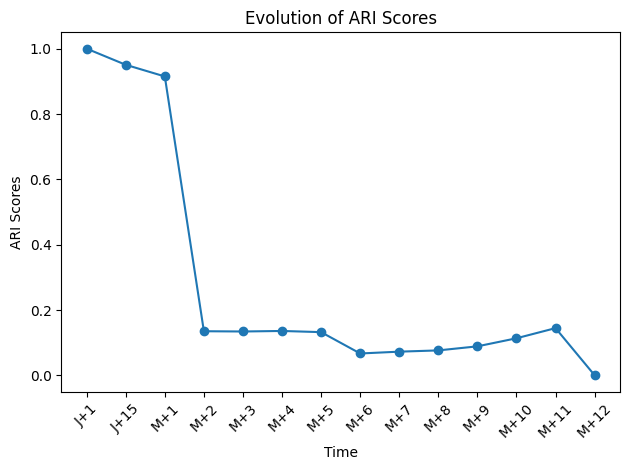

In [59]:
import matplotlib.pyplot as plt

labels = ['J+1', 'J+15', 'M+1', 'M+2', 'M+3', 'M+4', 'M+5', 'M+6', 'M+7', 'M+8', 'M+9', 'M+10', 'M+11', 'M+12']

# Create the plot
plt.plot(labels, ari_scores, marker='o')
plt.xlabel('Time')
plt.ylabel('ARI Scores')
plt.title('Evolution of ARI Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
